In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
'''
Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years

'''

'\nPrepare a prediction model for profit of 50_startups data.\nDo transformations for getting better predictions of profit and\nmake a table containing R^2 value for each prepared model.\n\nR&D Spend -- Research and devolop spend in the past few years\nAdministration -- spend on administration in the past few years\nMarketing Spend -- spend on Marketing in the past few years\nState -- states from which data is collected\nProfit  -- profit of each state in the past few years\n\n'

In [3]:
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data['State'] = data['State'].astype('category')
data['State'] = data['State'].cat.codes

In [5]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     int8   
 4   Profit           50 non-null     float64
dtypes: float64(4), int8(1)
memory usage: 1.7 KB


In [7]:
data.shape

(50, 5)

In [8]:
data.describe()

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,1.000000,112012.639200
std,45902.256482,28017.802755,122290.310726,0.832993,40306.180338
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,0.000000,90138.902500
50%,73051.080000,122699.795000,212716.240000,1.000000,107978.190000
75%,101602.800000,144842.180000,299469.085000,2.000000,139765.977500
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


In [9]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [10]:
data.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


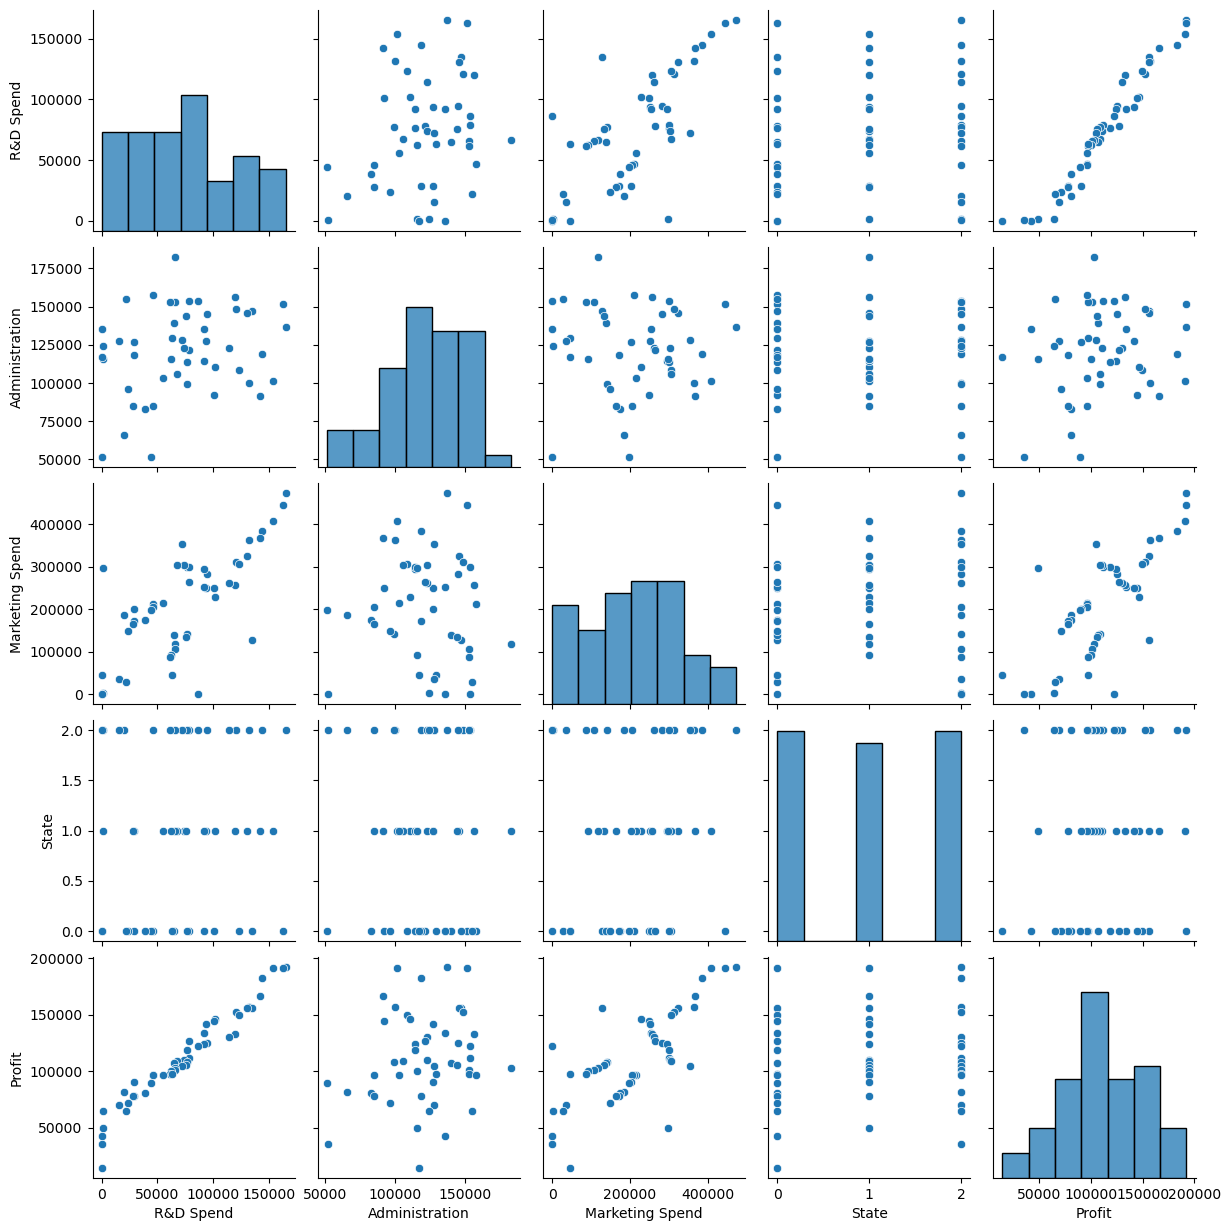

In [11]:
sns.pairplot(data)

In [12]:
#as seen above, we can drop state
data.drop(['State'], axis = 1)
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [13]:
data.rename(columns = {'R&D Spend':'RD'}, inplace = True)

In [14]:
data.rename(columns = {'Marketing Spend':'MSpend'}, inplace = True)

In [15]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~Administration+MSpend+RD',data=data).fit()

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           4.53e-30
Time:                        15:48:57   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
MSpend             0.0272      0.016      1.655      0.105      -0.006       0.060
RD                 0.8057      0.045     17.846      0.000       0.715       0.897
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
#Coefficients
model.params

Intercept         50122.192990
Administration       -0.026816
MSpend                0.027228
RD                    0.805715
dtype: float64

In [18]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept          7.626218
Administration    -0.525507
MSpend             1.655077
RD                17.846374
dtype: float64 
 Intercept         1.057379e-09
Administration    6.017551e-01
MSpend            1.047168e-01
RD                2.634968e-22
dtype: float64


In [19]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

Simple Linear Reg

In [20]:
P_RD=smf.ols('Profit~RD',data = data).fit()  
#t and p-Values
print(P_RD.tvalues, '\n', P_RD.pvalues) 

Intercept    19.320288
RD           29.151139
dtype: float64 
 Intercept    2.782697e-24
RD           3.500322e-32
dtype: float64


In [21]:
P_MSpend=smf.ols('Profit~MSpend',data = data).fit()  
#t and p-Values
print(P_MSpend.tvalues, '\n', P_MSpend.pvalues) 

Intercept    7.808356
MSpend       7.802657
dtype: float64 
 Intercept    4.294735e-10
MSpend       4.381073e-10
dtype: float64


In [22]:
P_Administration=smf.ols('Profit~Administration',data = data).fit()  
#t and p-Values
print(P_Administration.tvalues, '\n', P_Administration.pvalues) 

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


VIF

In [23]:
rsq_RD = smf.ols('RD~MSpend+Administration',data=data).fit().rsquared  
vif_RD = 1/(1-rsq_RD)

rsq_MSpend = smf.ols('MSpend~RD+Administration',data=data).fit().rsquared  
vif_MSpend = 1/(1-rsq_MSpend)

rsq_Administration = smf.ols('Administration~RD+MSpend',data=data).fit().rsquared  
vif_Administration = 1/(1-rsq_Administration)  

# Storing vif values in a data frame
d1 = {'Variables':['RD','Administration','MSpend'],'VIF':[vif_RD,vif_Administration,vif_MSpend]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame


,Variables,VIF
0,RD,2.468903
1,Administration,1.175091
2,MSpend,2.326773


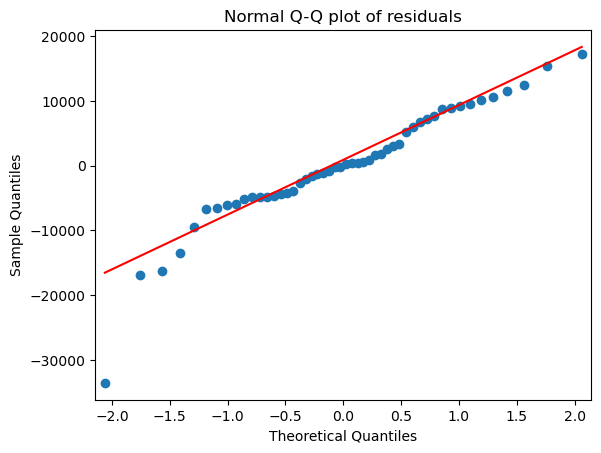

In [24]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [25]:
list(np.where(model.resid<-30000))

[array([49])]

In [26]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

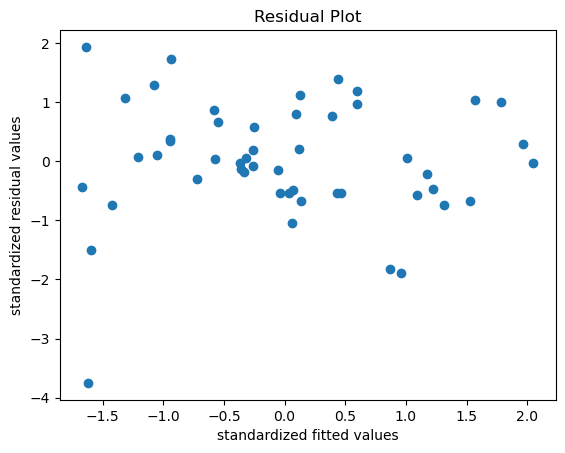

In [27]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

eval_env: 1


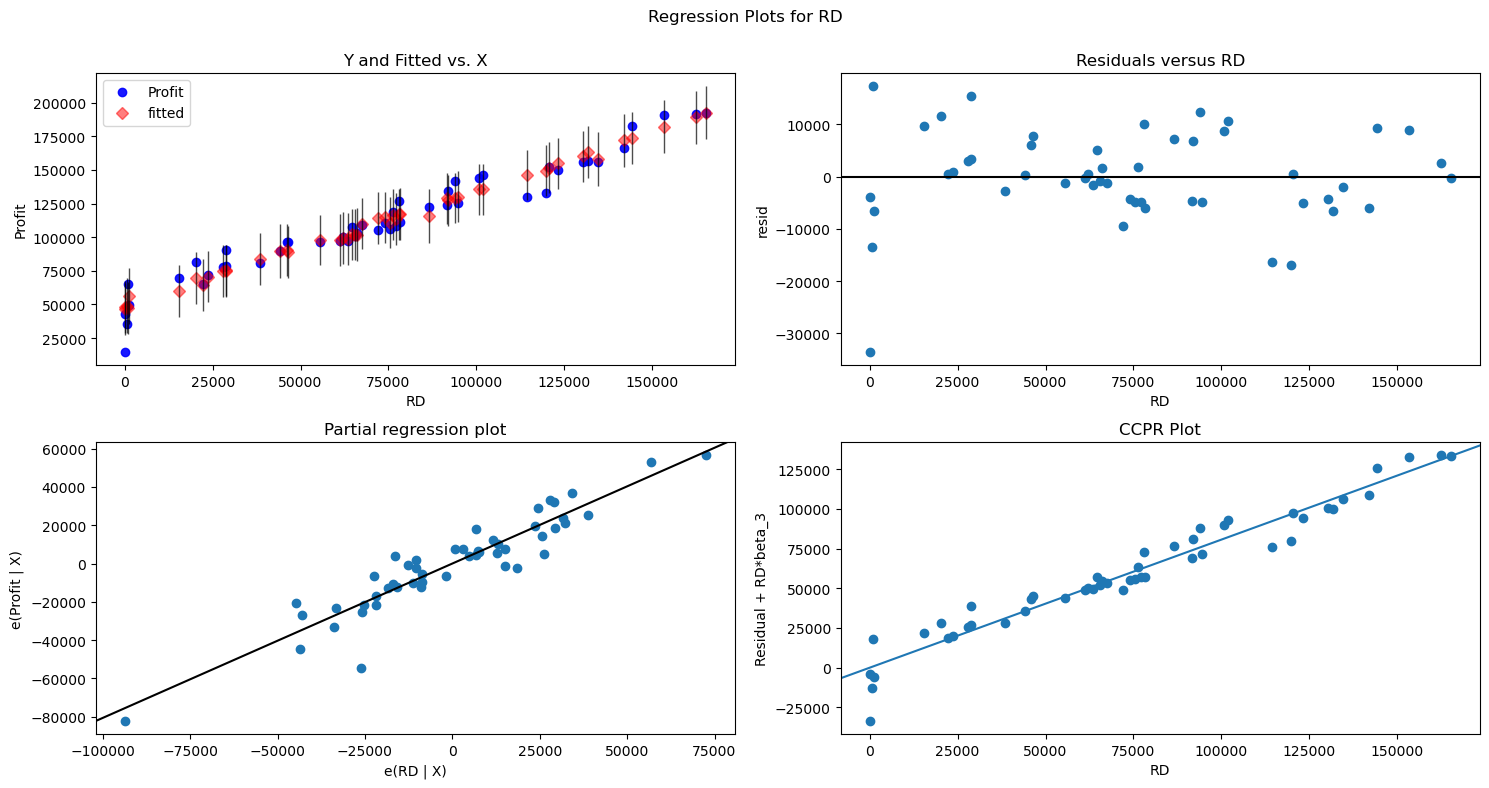

In [29]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RD',fig=fig)
plt.show()

eval_env: 1


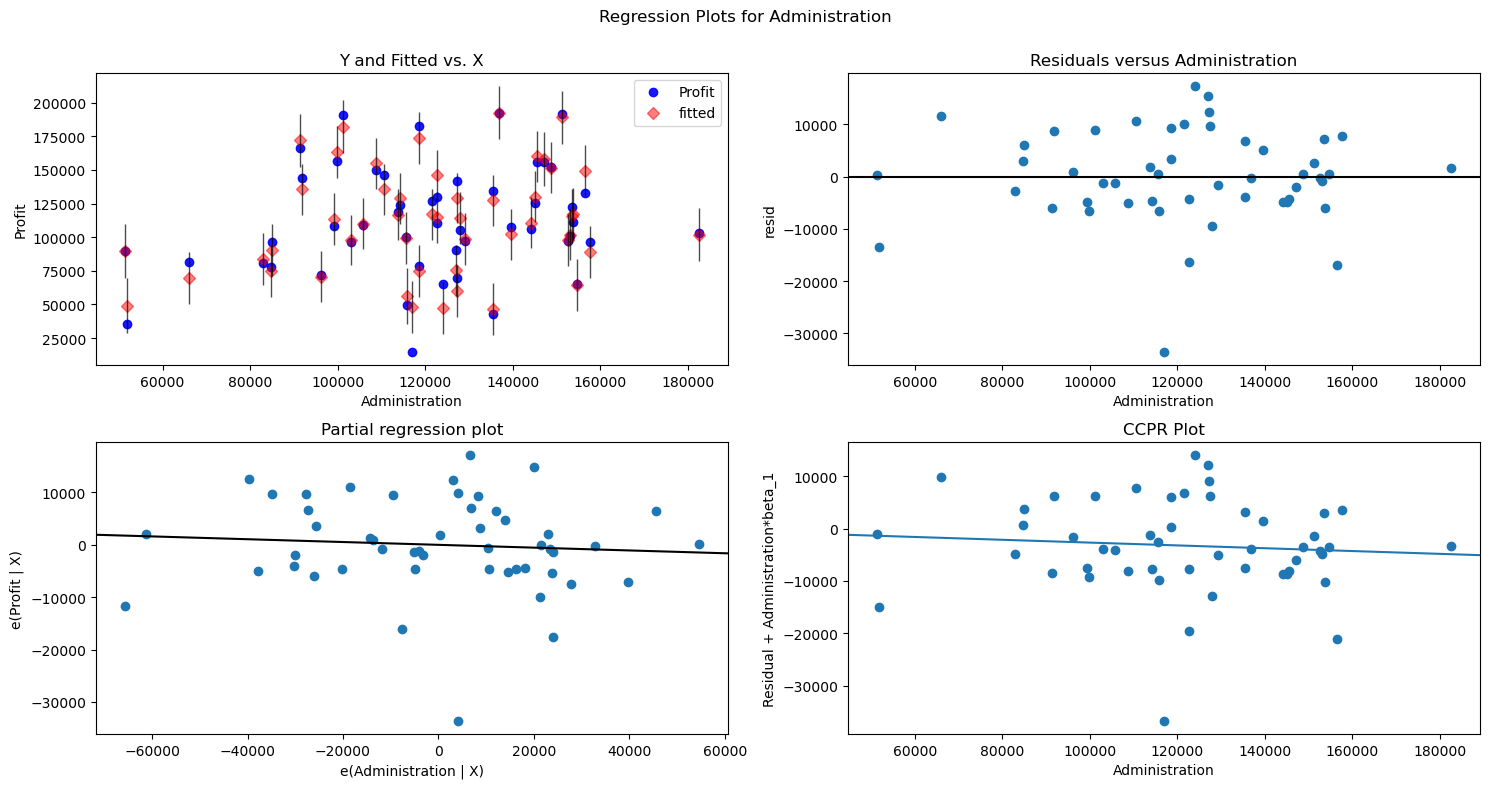

In [30]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Administration',fig=fig)
plt.show()

eval_env: 1


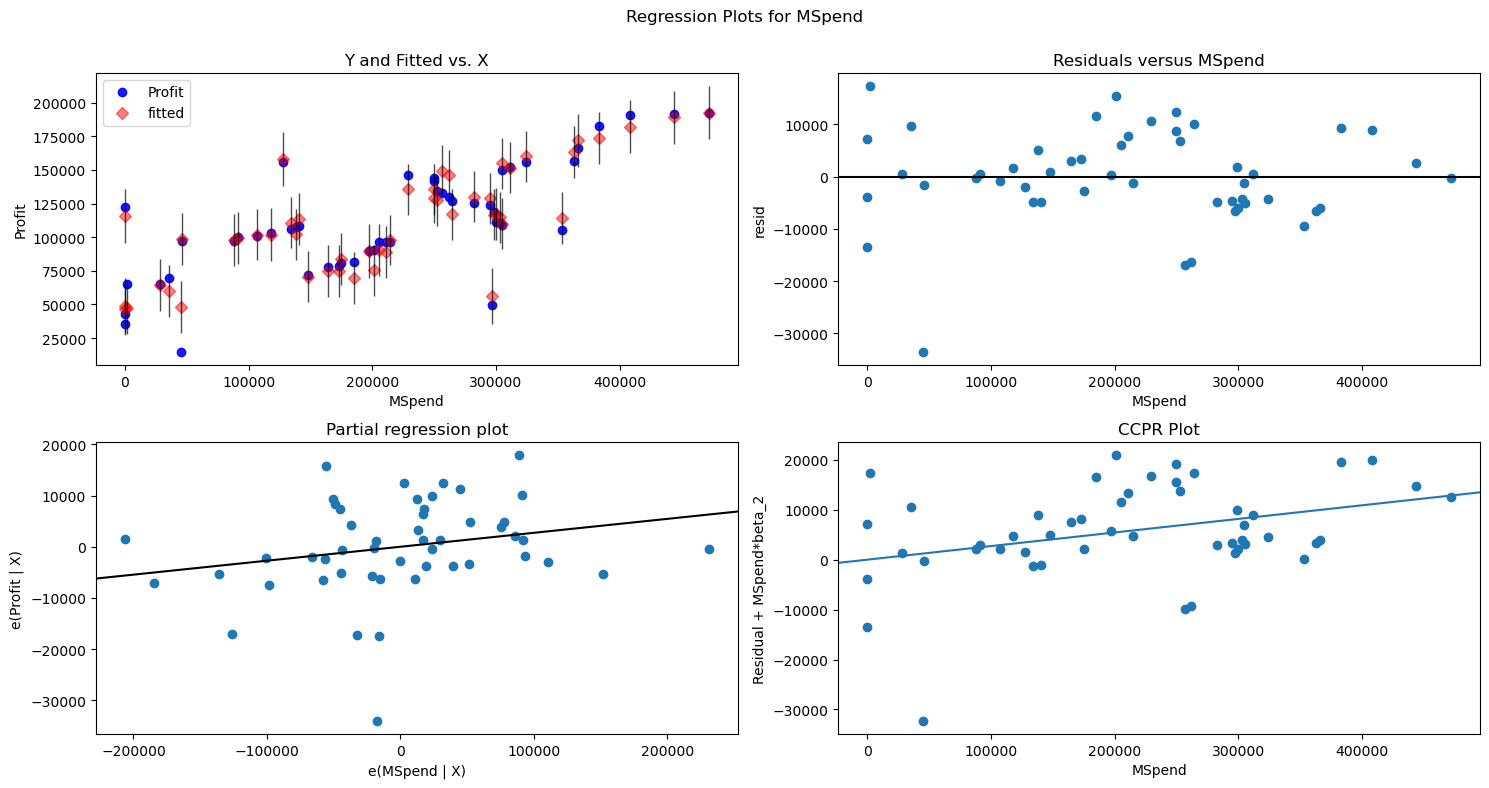

In [31]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MSpend',fig=fig)
plt.show()

Model Deletion Diagnostics (checking Outliers or Influencers)

In [32]:
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

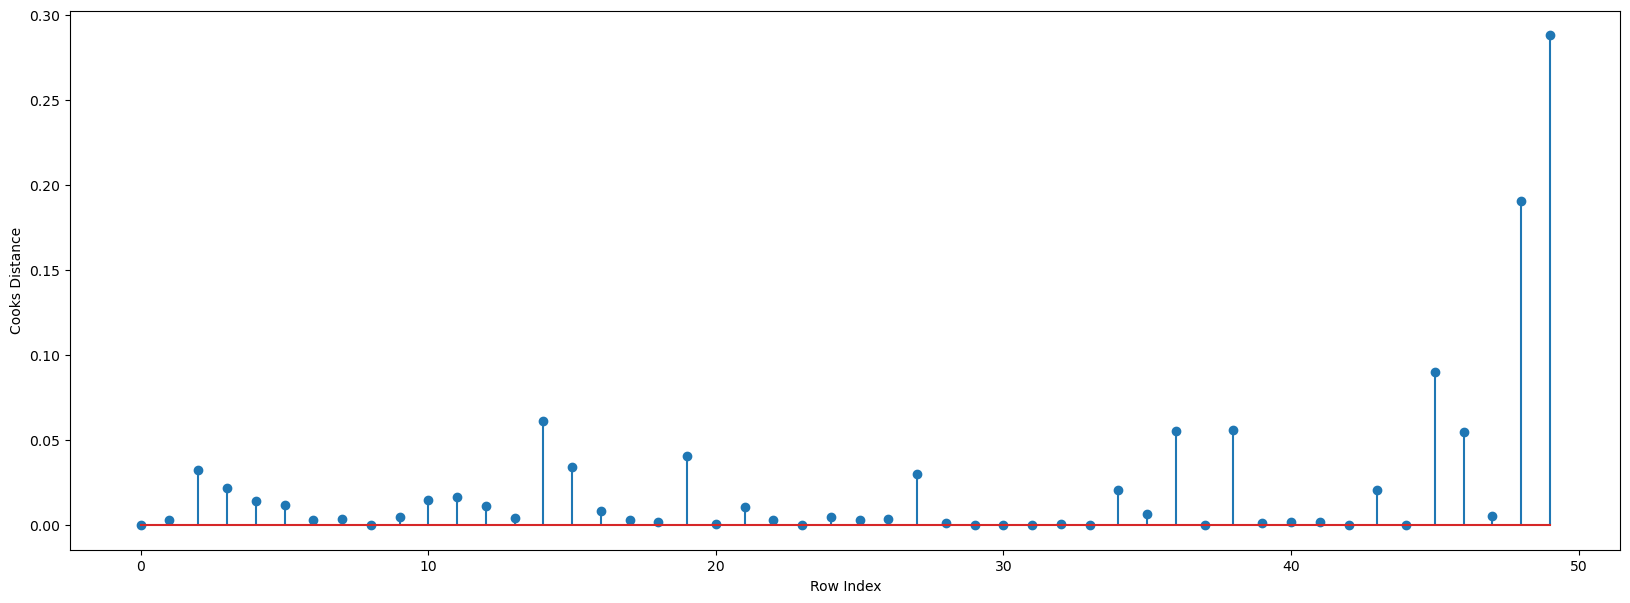

In [34]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [35]:
np.argmax(c) , np.max(c)

(49, 0.288082292754326)

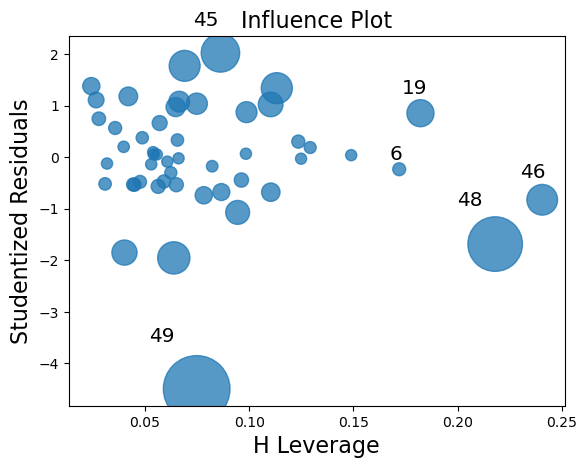

In [36]:
influence_plot(model)
plt.show()

In [38]:
k=data.shape[1]
n=data.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [40]:
data[data.index.isin([49])] 


,RD,Administration,MSpend,State,Profit
49,0.0,116983.8,45173.06,0,14681.4


Improving model

In [43]:
data2=data.drop(data.index[[49]],axis=0).reset_index(drop=True)
data2.head()

,RD,Administration,MSpend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [45]:
while np.max(c)>0.5 :
    model=smf.ols("Profit~RD+Administration+MSpend",data=data2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data2
else:
    final_model=smf.ols("Profit~RD+Administration+MSpend",data=data2).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129847


Prediction

In [46]:
new_data=pd.DataFrame({'RDS':70000,"ADMS":90000,"MKTS":140000},index=[0])
new_data

,RDS,ADMS,MKTS
0,70000,90000,140000


In [47]:
pred_y=final_model.predict(data2)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [48]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
